In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
user = pd.read_csv('user.csv')
user_ab_group = pd.read_csv('user_ab_group.csv')
good = pd.read_csv('good.csv')
user_purchase = pd.read_csv('user_purchase.csv')
purchase_good = pd.read_csv('purchase_good.csv')

In [98]:
user_ab_group

,user_id,group
0,5034,treatment
1,4725,treatment
2,911,treatment
3,13267,control
4,5636,control
...,...,...
11910,7599,control
11911,11476,treatment
11912,805,treatment
11913,1743,treatment


In [7]:
user.isna().sum()

user_id    0
gender     0
age        0
region     0
dtype: int64

In [8]:
user_ab_group.isna().sum()

user_id    0
group      0
dtype: int64

In [9]:
good.isna().sum()

id                0
good_name         0
price_per_unit    0
dtype: int64

In [10]:
user_purchase.isna().sum()

id           0
user_id      0
date_time    0
dtype: int64

In [11]:
purchase_good.isna().sum()

purchase_id                 0
good_id                     0
amount                      0
was_in_recommended_goods    0
dtype: int64

In [12]:
user

,user_id,gender,age,region
0,1,Ж,23,Краснодарский край
1,2,Ж,43,Краснодарский край
2,3,М,36,Краснодарский край
3,4,Ж,39,Краснодарский край
4,5,М,43,Иркутская область
...,...,...,...,...
14995,14996,М,41,Нижегородская область
14996,14997,Ж,30,Астраханская область
14997,14998,М,26,Краснодарский край
14998,14999,М,36,Оренбургская область


## Checking for a Sample Ratio Mismatch 

In [13]:
user_ab_group_t = user_ab_group[user_ab_group['group'] == 'treatment']

In [14]:
user_ab_group_c = user_ab_group[user_ab_group['group'] == 'control']

In [15]:
user_ab_group_t_count = user_ab_group_t.count()
user_ab_group_c_count = user_ab_group_c.count()

In [16]:
user_ab_group_t_count

user_id    5990
group      5990
dtype: int64

In [17]:
user_ab_group_c_count

user_id    5925
group      5925
dtype: int64

In [108]:
group_counts = user_ab_group['group'].value_counts()
expected_ratio = [0.5, 0.5]
expected_counts = [len(user_ab_group) * ratio for ratio in expected_ratio]
chi2_stat, p_value = chisquare(group_counts, expected_counts)
chi2_stat, p_value

(0.3545950482584977, 0.551523439600397)

*Since the p-value (0.55) is much more than the significance level (0.05), there is not enough evidence to conclude that there is a significant difference between the observed and expected frequencies. The observed distribution could reasonably occur by random chance. The sample does not show a significant deviation from what was expected.*

## Checking the independence of samples:

In [97]:
set(user_ab_group_t['user_id']).intersection(set(user_ab_group_c['user_id']))

set()

*Samples are independent.*

## Checking the distribution of demographic characteristics in both groups:

In [18]:
user_treatment = pd.merge(user_ab_group_t, user, on='user_id', how='left')

In [19]:
user_control = pd.merge(user_ab_group_c, user, on='user_id', how='left')

### 1. Age distribution

<Axes: xlabel='age', ylabel='Count'>

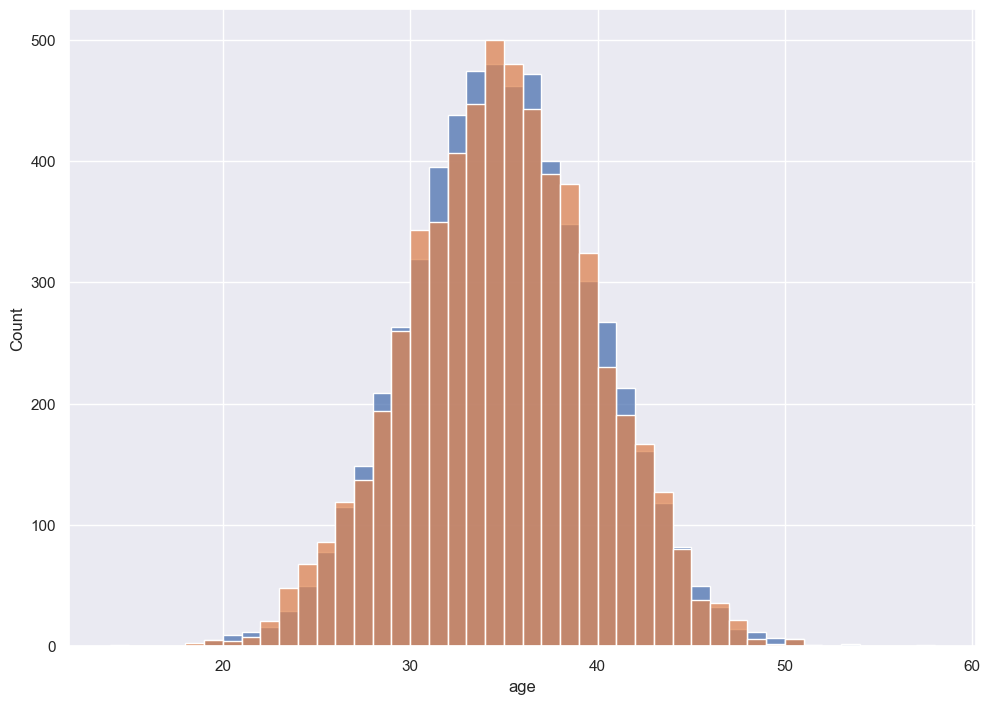

In [119]:
sns.histplot(data=user_treatment, x='age', binwidth=1)
sns.histplot(data=user_control, x='age', binwidth=1)

Levene test:

In [124]:
levene(user_treatment['age'], user_control['age'])

LeveneResult(statistic=0.2837561798696279, pvalue=0.5942597213318257)

*Levene's test indicates that the variances are equal (p-value (0.594) > 0.05)*

In [125]:
ttest_ind(user_treatment['age'], user_control['age'], equal_var=True)

TtestResult(statistic=0.7074179916671227, pvalue=0.4793205975492638, df=11913.0)

*The p-value for the t-test is 0.479 (greater than 0.05), so the age distribution in groups "Treatment" and "Control" is considered the same*

### 2. Gender distribution

In [132]:
gender_counts = user_treatment['gender'].value_counts()
expected_ratio = [0.5, 0.5]
expected_counts = [len(user_treatment) * ratio for ratio in expected_ratio]
chisquare(gender_counts, expected_counts)

Power_divergenceResult(statistic=0.45141903171953257, pvalue=0.5016618480508176)

*The p-value for the t-test is 0.502 (greater than 0.05), so the gender distribution in groups "Treatment" and "Control" is considered the same*

### 3. Region distribution

In [26]:
user_treatment['region'].unique()

array(['Краснодарский край', 'Астраханская область',
       'Нижегородская область', 'Санкт-Петербург', 'Оренбургская область',
       'Иркутская область', 'Республика Адыгея'], dtype=object)

In [27]:
user_control['region'].unique()

array(['Краснодарский край', 'Санкт-Петербург', 'Нижегородская область',
       'Иркутская область', 'Астраханская область',
       'Оренбургская область', 'Республика Адыгея'], dtype=object)

In [146]:
regions = user_control['region'].nunique()
regions

7

In [156]:
contingency_table = pd.concat([pd.crosstab(user_treatment['group'], user_treatment['region']), \
                               pd.crosstab(user_control['group'], user_control['region'])])
contingency_table

region,Астраханская область,Иркутская область,Краснодарский край,Нижегородская область,Оренбургская область,Республика Адыгея,Санкт-Петербург
group,,,,,,,
treatment,305,875,1865,773,629,125,1418
control,285,897,1857,835,614,113,1324


In [157]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=7.012980827253548, pvalue=0.3196484080489226, dof=6, expected_freq=array([[ 296.60931599,  890.83340327, 1871.152329  ,  808.38606798,
         624.89047419,  119.6491817 , 1378.47922786],
       [ 293.39068401,  881.16659673, 1850.847671  ,  799.61393202,
         618.10952581,  118.3508183 , 1363.52077214]]))

*The p-value for the t-test is 0.502 (greater than 0.05), so there is no significant difference in gender distribution between groups "Treatment" and "Control"*

*We can conclude that gender, age and regions are evenly distributed between groups.*

## How to evaluate how much more revenue the purchases brought in?

It seems a good choice to count following metrics:  
    1. Average revenue per user;  
    2. Average revenue per paying user;  
    3. Average revenue per user from algorithm-recommended products;  
    4. Average revenue per paying user from algorithm-recommended products.

The plan of analysis:  
    1. Keep the information only about the purchases of the users we need during the experiment period (from 01.10.23 to 14.10.23).  
    2. Calculate the revenues for each user described above.  
    3. Compare the average revenues in the "Treatment" and "Control" groups using a t-test.  
    4. Interpret the obtained result.
___

### 1. Let's keep the information only about the purchases of the users we need during the experiment period (from 01.10.23 to 14.10.23):

In [30]:
purchases = user_purchase.merge(purchase_good, left_on='id', right_on='purchase_id', how='left') \
                         .merge(good, left_on='good_id', right_on='id', how='left') \
                         .merge(user_ab_group, left_on='user_id', right_on='user_id', how='left')

In [32]:
purchases = purchases.copy()

In [33]:
purchases = purchases.dropna(subset='group')

In [34]:
purchases['date_time'] = pd.to_datetime(purchases['date_time'], format='%Y-%m-%d %H:%M:%S')

In [35]:
purchases = purchases[(purchases['date_time'] > pd.to_datetime('2023-10-01 00:00:00', format='%Y-%m-%d %H:%M:%S')) &
          (purchases['date_time'] < pd.to_datetime('2023-10-15 00:00:00', format='%Y-%m-%d %H:%M:%S'))]

In [36]:
purchases = purchases.drop(columns=['id_x'])

In [158]:
purchases

,user_id,date_time,purchase_id,good_id,amount,was_in_recommended_goods,good_name,price_per_unit,group,total
53254,12987,2023-10-01 00:02:30,11833,14,1,False,Бразильские орехи,434,treatment,434
53255,12987,2023-10-01 00:02:30,11833,11,1,False,Кедровые орехи,470,treatment,470
53256,12987,2023-10-01 00:02:30,11833,27,1,False,Ягоды годжи,587,treatment,587
53257,12987,2023-10-01 00:02:30,11833,53,1,False,Гранатовый сок натуральный,447,treatment,447
53258,5026,2023-10-01 00:02:46,11834,82,1,True,Паста из сладкой картошки,413,control,413
...,...,...,...,...,...,...,...,...,...,...
137776,9557,2023-10-14 23:58:28,26721,27,1,False,Ягоды годжи,587,treatment,587
137777,9557,2023-10-14 23:58:28,26721,73,1,True,Кунжутные лепёшки,425,treatment,425
137778,9557,2023-10-14 23:58:28,26721,6,1,True,Греческий йогурт с низким содержанием жира,426,treatment,426
137779,9557,2023-10-14 23:58:28,26721,37,1,True,Амарантовые хлопья,509,treatment,509


### 2. Let's calculate the revenues for each user:

In [159]:
purchases['total'] = purchases['amount'] * purchases['price_per_unit']

In [160]:
purchases_t = purchases[purchases['group'] == 'treatment']

In [161]:
purchases_c = purchases[purchases['group'] == 'control']

The revenues from each paying user for "Treatment" and "Control" groups:

In [162]:
bills_t = purchases_t.groupby('user_id').agg({'total' : 'sum'})
bills_c = purchases_c.groupby('user_id').agg({'total' : 'sum'})

The revenues from each user for "Treatment" and "Control" groups:

In [163]:
bills_t_all = user_treatment.merge(bills_t, left_on='user_id', right_on='user_id', how='left') \
                            .drop(columns=['group', 'gender', 'age', 'region']) \
                            .fillna(0)

In [164]:
bills_c_all = user_control.merge(bills_c, left_on='user_id', right_on='user_id', how='left') \
                            .drop(columns=['group', 'gender', 'age', 'region']) \
                            .fillna(0)

The revenues from each paying user from algorithm-recommended products for "Treatment" and "Control" groups:

In [168]:
bills_rec_t = purchases_t.query('was_in_recommended_goods == True').groupby('user_id').agg({'total' : 'sum'})
bills_rec_c = purchases_c.query('was_in_recommended_goods == True').groupby('user_id').agg({'total' : 'sum'})

The revenues from each user from algorithm-recommended products for "Treatment" and "Control" groups:

In [169]:
bills_rec_t_all = user_treatment.merge(bills_rec_t, left_on='user_id', right_on='user_id', how='left') \
                            .drop(columns=['group', 'gender', 'age', 'region']) \
                            .fillna(0)

In [170]:
bills_rec_c_all = user_control.merge(bills_rec_c, left_on='user_id', right_on='user_id', how='left') \
                            .drop(columns=['group', 'gender', 'age', 'region']) \
                            .fillna(0)

### 3. Let's compare the average revenues in the "Treatment" and "Control" groups using a t-test:

Firstly, it should be checked if variances are identical, using Levene test:

1. The revenues from each paying user for "Treatment" and "Control" groups:

<Axes: xlabel='total', ylabel='Count'>

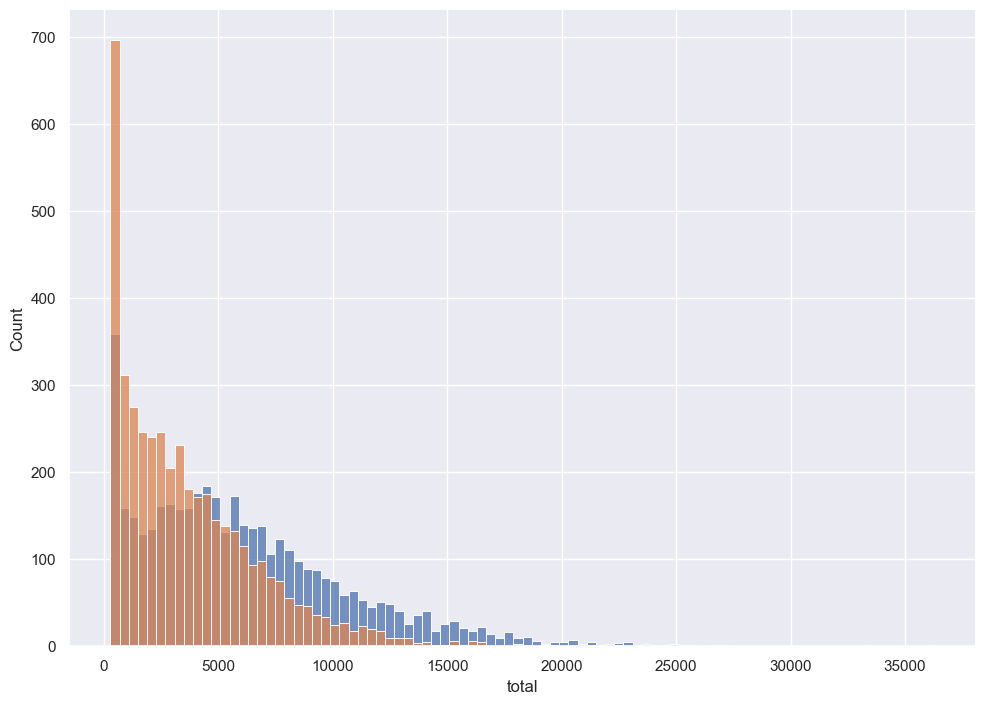

In [182]:
sns.histplot(data=bills_t['total'], binwidth=400)
sns.histplot(data=bills_c['total'], binwidth=400)

In [171]:
levene(bills_t['total'], bills_c['total'])

LeveneResult(statistic=430.0182173048538, pvalue=3.0420824391764643e-93)

2. The revenues from each user for "Treatment" and "Control" groups:

<Axes: xlabel='total', ylabel='Count'>

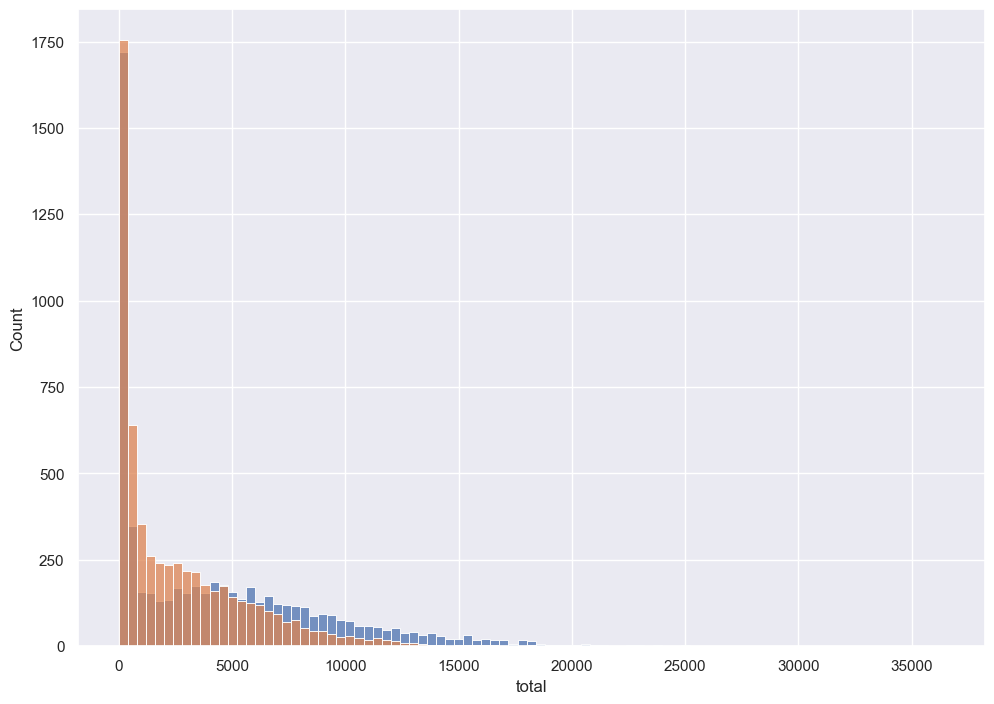

In [176]:
sns.histplot(data=bills_t_all['total'], binwidth=400)
sns.histplot(data=bills_c_all['total'], binwidth=400)

In [172]:
levene(bills_t_all['total'], bills_c_all['total'])

LeveneResult(statistic=773.1844635858525, pvalue=6.30352090593839e-165)

3. The revenues from each paying user from algorithm-recommended products for "Treatment" and "Control" groups:

<Axes: xlabel='total', ylabel='Count'>

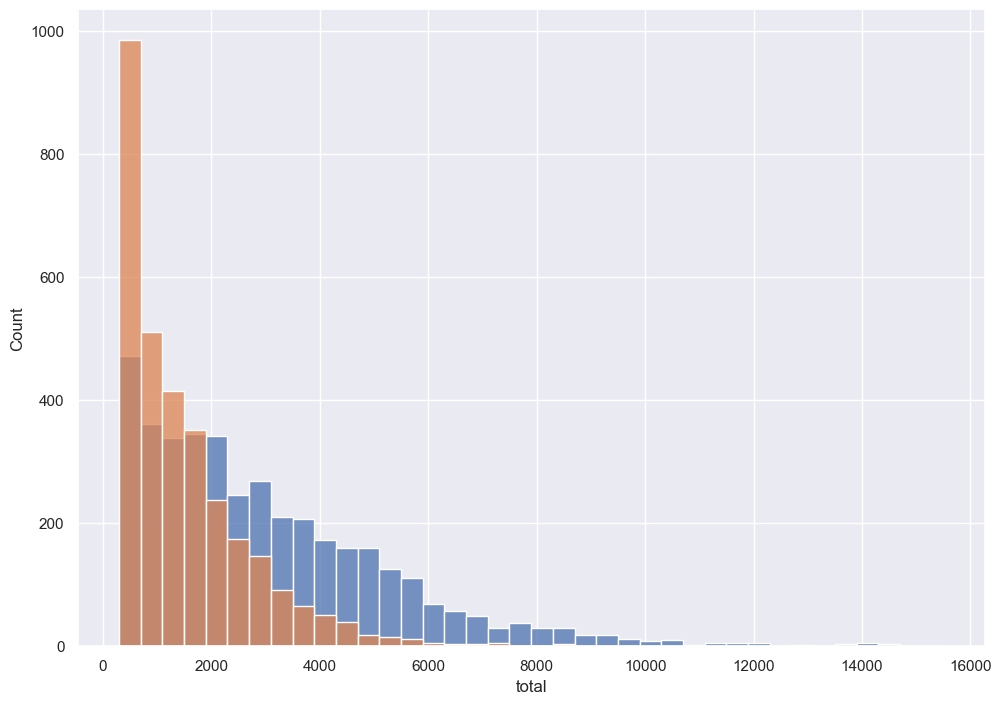

In [179]:
sns.histplot(data=bills_rec_t['total'], binwidth=400)
sns.histplot(data=bills_rec_c['total'], binwidth=400)

In [177]:
levene(bills_rec_t['total'], bills_rec_c['total'])

LeveneResult(statistic=741.2352401626503, pvalue=2.796753451825121e-155)

4. The revenues from each user from algorithm-recommended products for "Treatment" and "Control" groups:

<Axes: xlabel='total', ylabel='Count'>

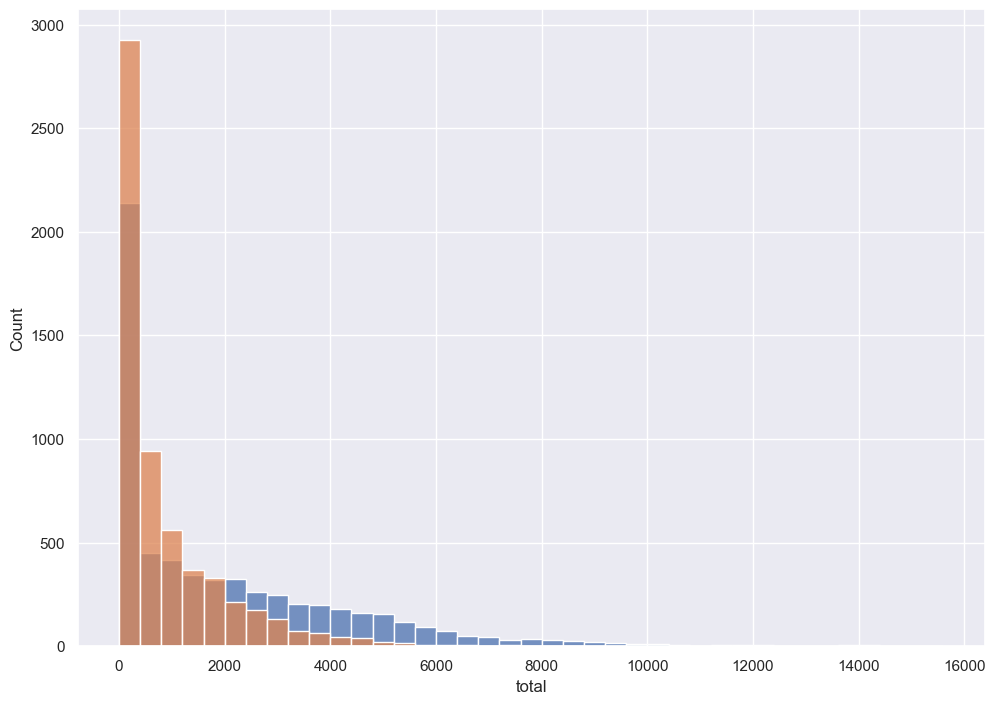

In [180]:
sns.histplot(data=bills_rec_t_all['total'], binwidth=400)
sns.histplot(data=bills_rec_c_all['total'], binwidth=400)

In [174]:
levene(bills_rec_t_all['total'], bills_rec_c_all['total'])

LeveneResult(statistic=1448.7929978024074, pvalue=2.8357082727230253e-299)

*The p-values for the Levene tests are much smaller than 0.05. Therefore, the variances of all considered metrics are significantly different across the groups. Consequently, Welch’s t-test should be applied.  
As noted, the data is not normally distributed. However, the sample sizes are large (n > 30), so the Central Limit Theorem states that the distribution of the sample means will be approximately normally distributed, regardless of the shape of the underlying distribution.*

#### Comparison the average revenues in the 'Control' and 'Treatment' groups applying a Welch's t-test:

1. The average revenues per paying user for "Treatment" and "Control" groups:

In [186]:
ARPPU_t = bills_t['total'].mean()
ARPPU_c = bills_c['total'].mean()
ARPPU_t, ARPPU_c

(6154.173822232537, 3668.4195361911457)

Welch's t-test:

In [187]:
ttest_ind(bills_t['total'], bills_c['total'], equal_var=False)

TtestResult(statistic=29.470359805661392, pvalue=1.0081442289820742e-180, df=7502.431400502748)

*The p-value is much smaller than our threshold (0.05), so we have evidence against the null hypothesis of equal population means. Therefore, there is a significant difference between the means of the average revenues per paying user for "Treatment" and "Control"  groups.*

2. The average revenues per user for "Treatment" and "Control" groups:

In [189]:
ARPU_t = bills_t_all['total'].mean()
ARPU_c = bills_c_all['total'].mean()
ARPU_t, ARPU_c

(4427.101001669449, 2643.119493670886)

Welch's t-test:

In [190]:
ttest_ind(bills_t_all['total'], bills_c_all['total'], equal_var=False)

TtestResult(statistic=24.233967540582896, pvalue=3.3634787988538025e-126, df=10232.906892414549)

*The p-value is much smaller than our threshold (0.05), so we have evidence against the null hypothesis of equal population means. Therefore, there is a significant difference between the means of the average revenues per user for "Treatment" and "Control"  groups.*

3. The average revenue per paying user from algorithm-recommended products:

In [193]:
ARPPU_rec_t = bills_rec_t['total'].mean()
ARPPU_rec_c = bills_rec_c['total'].mean()
ARPPU_rec_t, ARPPU_rec_c

(3027.353166496425, 1513.0772669220944)

Welch's t-test:

In [192]:
ttest_ind(bills_rec_t['total'], bills_rec_c['total'])

TtestResult(statistic=33.71407217854639, pvalue=3.843874155207315e-231, df=7046.0)

*The p-value is much smaller than our threshold (0.05), so we have evidence against the null hypothesis of equal population means. Therefore, there is a significant difference between the means of the average revenue per paying user from algorithm-recommended products for "Treatment" and "Control"  groups.*

4. The average revenue per user from algorithm-recommended products:

In [194]:
ARPU_rec_t = bills_rec_t_all['total'].mean()
ARPU_rec_c = bills_rec_c_all['total'].mean()
ARPU_rec_t, ARPU_rec_c

(1979.1510851419032, 799.824135021097)

Welch's t-test:

In [195]:
ttest_ind(bills_rec_t_all['total'], bills_rec_c_all['total'])

TtestResult(statistic=34.88988977021957, pvalue=4.967277453732467e-254, df=11913.0)

*The p-value is much smaller than our threshold (0.05), so we have evidence against the null hypothesis of equal population means. Therefore, there is a significant difference between the means of the average revenue per user from algorithm-recommended products for "Treatment" and "Control"  groups.*

### 3. Results interpretation

<code style="background:DarkSeaGreen;color:black">The findings described above indicate that the changes made to the recommendation algorithm had a notable impact on user revenue metrics. For example, the ARPU for the "Treatment" and "Control" groups are 4427 and 2643, respectively. Additionally, the ARPUs from algorithm-recommended products for the "Treatment" and "Control" groups are 1979 and 800, respectively. We can confidently conclude that the experimental algorithm improved user engagement and revenue generation compared to the control group.</code>